# Распаковка датасетов, первый взгляд

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# Чтение данных из таблиц

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

# Полные данные о каждой из таблиц

print('-----------------------Звонки---------------------')
display(calls.head(5))
calls.info()
print('----------------------Интернет--------------------')
display(internet.head(5))
internet.info()
print('----------------------Сообщения-------------------')
display(messages.head(5))
messages.info()
print('-----------------------Тарифы---------------------')
display(tariffs.head(5))
tariffs.info()
print('--------------------Пользователи------------------')
display(users.head(5))
users.info()

-----------------------Звонки---------------------


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
----------------------Интернет--------------------


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
----------------------Сообщения-------------------


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
-----------------------Тарифы---------------------


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
--------------------Пользователи------------------


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Комментарий: Мы получили несколько таблиц, с которыми по отдельности достаточно неудобно работать, необходимо объеденить таблицы в одну, также мы видим, что есть несоответствие в данных -> в таблице "Звонки", "Интернет","Сообщения","Пользователи", дата хранится в формате строки. Таблица "Пользователи" имеет пропуски в столбце "churn_date", необходимо более подробно рассмотреть в чем причина данных пропусков. Также таблица "Интернет" имеет не понятный столбец "Unnamed: 0". Пропуски в столбце "churn_date" только у тех пользователей которые продолжают пользоваться услугами связи. 

# Предобработка данных

In [2]:
# Проверка названий столбцов

print(calls.columns)
print(internet.columns)
print(messages.columns)
print(tariffs.columns)
print(users.columns)

# Cтолбец "Unnamed: 0" просто дублирует индекс, возможно ошибка произошла при выгрузке данных, избавимся от него

new_internet = internet.loc[:, 'id':'user_id']

# Проверим таблицы на дубликаты

calls[calls.duplicated()]
new_internet[new_internet.duplicated()]
messages[messages.duplicated()]
tariffs[tariffs.duplicated()]
users[users.duplicated()]

# Приведем в порядок дату в таблицах и т.к нам в следующих рассчетах требуется только месяц создадим такой столбец
import calendar

calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls['month'] = calls['call_date'].dt.month.apply(lambda x: calendar.month_abbr[x])

messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month.apply(lambda x: calendar.month_abbr[x])

new_internet['session_date'] = pd.to_datetime(new_internet['session_date'], format = '%Y-%m-%d')
new_internet['month'] = new_internet['session_date'].dt.month.apply(lambda x: calendar.month_abbr[x])

messages['reg_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

messages['reg_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')

# Разберемся с пропуском в таблице "Пользователи"

users[pd.notnull(users['churn_date'])]

# Пользователи у которых значение churn_date != NaN это пользователи,
# которые больше не пользуются услугами связи, для того чтобы не "страдала" дата и
# не было пропусков делаем следующее - если значение NaN, значит значение = reg_date. Таким образом можно вы-
# делить группы -> если churn_date == reg_date -> пользователь еще пользуется связью, если нет, то нет

pd.options.mode.chained_assignment = None # Отключение предупреждения

# Замена всех пустых значений

users['churn_date'].loc[users['churn_date'].isnull()] = users['reg_date'].loc[users['churn_date'].isnull()]

display(calls)

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')
Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')
Index(['id', 'message_date', 'user_id'], dtype='object')
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')
Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,Jul
1,1000_1,2018-08-17,0.00,1000,Aug
2,1000_2,2018-06-11,2.85,1000,Jun
3,1000_3,2018-09-21,13.80,1000,Sep
4,1000_4,2018-12-15,5.18,1000,Dec
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,Dec
202603,1499_216,2018-10-18,18.83,1499,Oct
202604,1499_217,2018-11-10,10.81,1499,Nov
202605,1499_218,2018-10-06,4.27,1499,Oct


Комментарий: Относительно предыдущих проектов, данные очень даже не плохие, у нас нет дубликатов, у нас правильно названы столбцы, все что мы сделали, это привели в порядок дату, избавились от лишних столбцов, а также решили вопрос с пропусками в столбце churn_date

In [3]:
# Процент звонков с продолжительностью 0

# Процент таких звонков достаточно большой почти 20 %, но если посмотреть в дальнейшие рассчеты, то мы видим, что мы будем нахо-
# продолжительность звонков -> нулевые значения ни как не влияют на этот параметр

print('Процент данных с нулевыми звонками:', round(len(calls[calls['duration'] == 0]) / len(calls) * 100, 2), '%')

# Округление продолжительности звонков в большую сторону (0.1 -> 1)

calls['duration'] = np.ceil(calls['duration'])

Процент данных с нулевыми звонками: 19.55 %


Комментарий: Данных с нулевыми звонками практически 20 процентов, нельзя просто так от них избавляться, тем более что в дальнейшем мы будем считать количество звонков по месяцам хоть это и возможно пропущенные звонки, но я бы не стал избавляться от большого "куска пирога" т.к эти звонки все же были зафиксированы. Произведено округление значений в соответствии с условиями связи

# Рассчет дополнительных данных для пользователей

In [4]:
# Количество сделанных звонков и израсходованных минут разговора по месяцам

calls_duration_sum_count = calls.pivot_table(index = ['user_id', 'month'], values = 'duration' , aggfunc = ['count','sum'])
calls_duration_sum_count.columns = ['count_duration', 'month_duration_calls']

# Количество отправленных сообщений по месяцам

messages_count = messages.pivot_table(index = ['user_id', 'month'] , values = 'id', aggfunc = 'count')
messages_count.columns = ['count_messages']

# Объем израсходованного интернет-трафика по месяцам

new_internet_sum_mb = new_internet.pivot_table(index = ['user_id','month'] , values = 'mb_used', aggfunc = 'sum')

#Объеденим все таблиццы в одну

message_internet_calls = pd.merge(new_internet_sum_mb, messages_count, how='outer', on = ('user_id', 'month'))
message_internet_calls = pd.merge(message_internet_calls, calls_duration_sum_count, how='outer', on = ('user_id', 'month'))

tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included',
'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute','tariff']

users_tariffs = users.merge(tariffs, on = 'tariff')

message_internet_calls = message_internet_calls.swaplevel('user_id','month')
message_internet_calls = message_internet_calls.reset_index()

data_merge = message_internet_calls.merge(users_tariffs, on = 'user_id')

#В моем мире это выглядит просто изумительно, я надеюсь нигде не ошибся, если ошибся, поправь пожалуйста

# Пропуски обнулим, потому что если есть пропуск в данной таблице, это значит мы либо не звонили в этом месяце, либо не 
# писали сообщения и т.д.

data_merge.fillna(value = 0, inplace=True)

# Рассчитаем доход по месяцам для каждого пользователя

def revenue_data_merge(row):
    result = 0
 
    if row['count_messages'] > row['messages_included']:
        result += (row['count_messages'] - row['messages_included'])  * row['rub_per_message']
    
    if row['mb_used'] > row['mb_per_month_included']:
        result += (row['mb_used'] - row['mb_per_month_included']) / 1024 * row['rub_per_gb']
    
    if row['month_duration_calls'] > row['minutes_included']:
        result += (row['month_duration_calls'] - row['minutes_included']) * row['rub_per_minute']
        
    
    result += row['rub_monthly_fee']

    return round(result, 2)


data_merge['revenue'] = data_merge.apply(revenue_data_merge, axis=1)

# Нужно для того, чтобы строить графики по отсортированным месяцам (month -> str) по другому не нашел, как в моем случае
# буду благодарен, если покажешь альтернативу

def num_month(row):

    month = {
            'Jan' : 1,
            'Feb' : 2,
            'Mar' : 3,
            'Apr' : 4,
            'May' : 5,
            'Jun' : 6,
            'Jul' : 7,
            'Aug' : 8,
            'Sep' : 9, 
            'Oct' : 10,
            'Nov' : 11,
            'Dec' : 12
            }
    
    for key, value in month.items():
        if row['month'] == key:
            return value
            
            
data_merge['month_number'] = data_merge.apply(num_month, axis=1)

data_merge = data_merge.sort_values(by = 'user_id')
display(data_merge)


,month,user_id,mb_used,count_messages,count_duration,month_duration_calls,age,churn_date,city,first_name,...,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,month_number
0,Aug,1000,14055.93,81.0,52.0,408.0,52,2018-05-25,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,1950.00,8
1,Dec,1000,9817.61,70.0,46.0,333.0,52,2018-05-25,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,1950.00,12
2,Jul,1000,14003.64,75.0,47.0,340.0,52,2018-05-25,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,1950.00,7
3,Jun,1000,23233.77,60.0,43.0,172.0,52,2018-05-25,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,1950.00,6
4,May,1000,2253.49,22.0,22.0,159.0,52,2018-05-25,Краснодар,Рафаил,...,ultra,1000,30720,3000,1950,150,1,1,1950.00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,Aug,1498,24235.21,62.0,57.0,400.0,68,2018-10-25,Владикавказ,Всеволод,...,smart,50,15360,500,550,200,3,3,2319.44,8
3204,Oct,1499,17788.51,48.0,68.0,449.0,35,2018-09-27,Пермь,Гектор,...,smart,50,15360,500,550,200,3,3,1024.32,10
3205,Sep,1499,1845.75,11.0,9.0,70.0,35,2018-09-27,Пермь,Гектор,...,smart,50,15360,500,550,200,3,3,550.00,9
3202,Dec,1499,13055.58,66.0,69.0,492.0,35,2018-09-27,Пермь,Гектор,...,smart,50,15360,500,550,200,3,3,598.00,12


Комментарий: 

На данном этапе мы произвели все дополнительные рассчеты, а именно:

1. Количество сделанных звонков и израсходованных минут разговора по месяцам;
2. Количество отправленных сообщений по месяцам;
3. Объем израсходованного интернет-трафика по месяцам;
4. Доход по месяцам для каждого пользователя.

# Анализ данных. Построение графиков

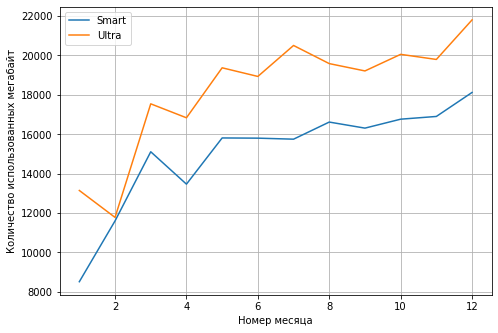

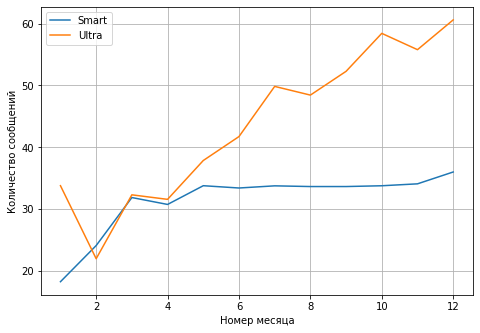

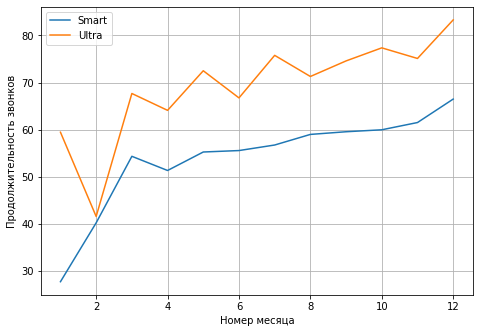

In [5]:
#Сравним графики использованного интернета для тарифов 
analys_data_merge_mb_used = data_merge.pivot_table(index = ['tariff','month_number'], values = 'mb_used', aggfunc = 'mean')
analys_data_merge_mb_used = analys_data_merge_mb_used.reset_index()

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid()
ax.set_xlabel('Номер месяца')
ax.set_ylabel('Количество использованных мегабайт')


ax.plot(analys_data_merge_mb_used['month_number'][0:12], analys_data_merge_mb_used['mb_used'][0:12], label="Smart")
ax.plot(analys_data_merge_mb_used['month_number'][12:], analys_data_merge_mb_used['mb_used'][12:], label="Ultra")

ax.legend()


#Сравним графики отправленных сообщений для тарифов

analys_data_messages_used = data_merge.pivot_table(index = ['tariff','month_number'], values = 'count_messages', aggfunc = 'mean')
analys_data_messages_used = analys_data_messages_used.reset_index()

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid()
ax.set_xlabel('Номер месяца')
ax.set_ylabel('Количество сообщений')


ax.plot(analys_data_messages_used['month_number'][0:12], analys_data_messages_used['count_messages'][0:12], label="Smart")
ax.plot(analys_data_messages_used['month_number'][12:], analys_data_messages_used['count_messages'][12:], label="Ultra")

ax.legend()


#Сравним графики длительности звонков для тарифов 

analys_data_calls_used = data_merge.pivot_table(index = ['tariff','month_number'], values = 'count_duration', aggfunc = 'mean')
analys_data_calls_used = analys_data_calls_used.reset_index()

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.grid()
ax.set_xlabel('Номер месяца')
ax.set_ylabel('Продолжительность звонков')


ax.plot(analys_data_calls_used['month_number'][0:12], analys_data_calls_used['count_duration'][0:12], label="Smart")
ax.plot(analys_data_calls_used['month_number'][12:], analys_data_calls_used['count_duration'][12:], label="Ultra")

ax.legend()

Комментарий: Как видно исходя из графиков пользователи тарифа Ultra гораздо больше используют потенциал тарифа по каждому из представленных пунктов (звонки, интернет трафик, сообщения), но если внимательнее рассмотреть показатели то пользователи тарифа Smart больше выходят за рамки ограничений, бесплатного интернета т.е переплачивают за дополнительлное использование, таким образом можно утверждать, что хоть абонентская плата и меньше, но переплата за услуги больше.  

# Анализ данных. Построение гистограмм

Дисперсия тарифа ultra: 1928.69 
Cреднее значение ultra: 73.39 
Стандартное отклонение ultra: 43.92 

Дисперсия тарифа smart: 672.88 
Cреднее значение smart: 58.46 
Стандартное отклонение smart: 25.94 



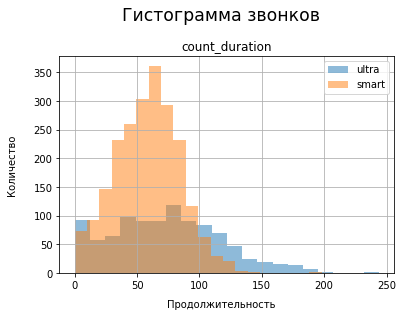

In [6]:
# Построение гистограммы для продолжительности звонков

ultra = data_merge.loc[data_merge['tariff'] == 'ultra']
smart = data_merge.loc[data_merge['tariff'] == 'smart']

fig, axes = plt.subplots(sharex=True, sharey=True)

ultra.hist('count_duration', alpha=0.5, ax=axes, label='ultra', bins = 20)
smart.hist('count_duration', alpha=0.5, ax=axes, label = 'smart', bins = 20)
plt.legend(loc='upper right')


plt.suptitle('Гистограмма звонков', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.004, 'Продолжительность', ha='center')
fig.text(0.004, 0.5, 'Количество', va='center', rotation='vertical')

variance_estimate_ultra_dur = np.var(ultra['count_duration'], ddof=1)
variance_estimate_smart_dur = np.var(smart['count_duration'], ddof=1)


(print
 ('Дисперсия тарифа ultra:', round(variance_estimate_ultra_dur, 2),
  '\nCреднее значение ultra:', round(ultra['count_duration'].mean(), 2),
  '\nСтандартное отклонение ultra:', round(np.sqrt(variance_estimate_ultra_dur), 2), '\n')
)

(print
 ('Дисперсия тарифа smart:', round(variance_estimate_smart_dur, 2),
  '\nCреднее значение smart:', round(smart['count_duration'].mean(), 2),
  '\nСтандартное отклонение smart:', round(np.sqrt(variance_estimate_smart_dur), 2), '\n')
)

plt.show()

Комментарий: Распределение тарифа smart имеет вид нормального распределения, с средним значением в районе 60 минут, что подтверждают рассчеты и сам график, исходя из этого можно утверждать, что пользователи данного тарифа используют связь довольно редко (60 +- 35 (стандартное отклонение)) с возможностью бесплатных минут в 3000. Пользователи тарифа ультра также не используют потенциал тарифа в безлимитных звонках, среднее значение находится в диапазоне 47 минут +- 21 с возможностью бесплатных звонков 500. Распределение могло бы быть похоже на нормальное, но мы видим что большая часть звонков происходит в районе от 0 до 10 минут.

Дисперсия тарифа ultra: 2285.27 
Cреднее значение: 49.36 
Стандартное отклонение: 47.8 

Дисперсия тарифа smart: 796.81 
Cреднее значение: 33.38 
Стандартное отклонение: 28.23 



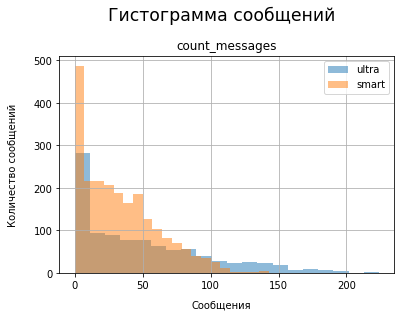

In [7]:
# Построение гистограммы для количества сообщений

fig, axes = plt.subplots(sharex=True, sharey=True)

ultra.hist('count_messages', alpha=0.5, ax=axes, label='ultra', bins = 20)
smart.hist('count_messages', alpha=0.5, ax=axes, label = 'smart', bins = 20)
plt.legend(loc='upper right')


plt.suptitle('Гистограмма сообщений', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.004, 'Сообщения', ha='center')
fig.text(0.004, 0.5, 'Количество сообщений', va='center', rotation='vertical')

variance_estimate_ultra_message = np.var(ultra['count_messages'], ddof=1)
variance_estimate_smart_message = np.var(smart['count_messages'], ddof=1)

(print
 ('Дисперсия тарифа ultra:', round(variance_estimate_ultra_message, 2),
  '\nCреднее значение:', round(ultra['count_messages'].mean(), 2),
  '\nСтандартное отклонение:', round(np.sqrt(variance_estimate_ultra_message), 2), '\n')
)

(print
 ('Дисперсия тарифа smart:', round(variance_estimate_smart_message, 2),
  '\nCреднее значение:', round(smart['count_messages'].mean(), 2),
  '\nСтандартное отклонение:', round(np.sqrt(variance_estimate_smart_message), 2), '\n')
)


plt.show()

Комментарий: Распределения сообщений по представленным тарифам имеет вид распределения Пауссона. Для пользователей тарифа ultra количество бесплатных сообщений установлено в значение 1000, по данному распределению можно сказать, что большая часть пользователей отправляет от 0 до 10 сообщений, и их предел заканчивается у границы с значением в 200, т.е пользователи так же не используют полностью потенциал тарифа, что нельзя сказать о пользователях тарифа smart с них компания получает большую выгоду т.к количество бесплатных сообщений составляет 50 а пользователи данного тарифа (таких пользователей достаточно много примерно 300 человек) отправляют сообщения сверх лимита, что является + в рекомендации использования тарифа smart для компании.

In [9]:
# Процент пользователей с переплатой за сообщения по каждому тарифу за сообщения

print('Процент переплат ultra:', len(ultra.loc[ultra['count_messages'] > 1000]) / len(ultra))
print('Процент переплат smart:', round(len(smart.loc[smart['count_messages'] > 50]) / len(smart) * 100, 2), '%')

Процент переплат ultra: 0.0
Процент переплат smart: 25.3 %


Дисперсия тарифа ultra: 2285.27 
Cреднее значение: 19468.81 
Стандартное отклонение: 47.8 

Дисперсия тарифа smart: 796.81 
Cреднее значение: 16208.39 
Стандартное отклонение: 28.23 



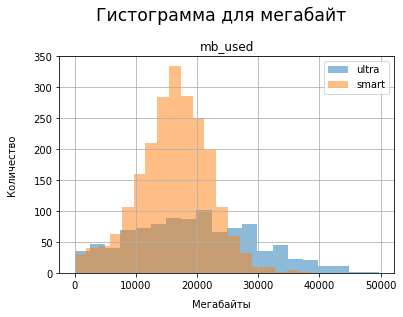

In [10]:
# Построение гистограммы для количества использованных мегабайт

fig, axes = plt.subplots(sharex=True, sharey=True)

ultra.hist('mb_used', alpha=0.5, ax=axes, label='ultra', bins = 20)
smart.hist('mb_used', alpha=0.5, ax=axes, label = 'smart', bins = 20)
plt.legend(loc='upper right')

plt.suptitle('Гистограмма для мегабайт', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.004, 'Мегабайты', ha='center')
fig.text(0.004, 0.5, 'Количество', va='center', rotation='vertical')

variance_estimate_ultra_mb = np.var(ultra['mb_used'], ddof=1)
variance_estimate_smart_mb = np.var(smart['mb_used'], ddof=1)

(print
 ('Дисперсия тарифа ultra:', round(variance_estimate_ultra_message, 2),
  '\nCреднее значение:', round(ultra['mb_used'].mean(), 2),
  '\nСтандартное отклонение:', round(np.sqrt(variance_estimate_ultra_message), 2), '\n')
)

(print
 ('Дисперсия тарифа smart:', round(variance_estimate_smart_message, 2),
  '\nCреднее значение:', round(smart['mb_used'].mean(), 2),
  '\nСтандартное отклонение:', round(np.sqrt(variance_estimate_smart_message), 2), '\n')
)

plt.show()

Комментарий: Распределение тарифа smart имеет вид нормального распределения, в то время как тариф ultra имеет более ровный вид (+- ровный). Исходя из данного распределения сразу можно дать оценку того что более выгодной продажей будет продажа тарифа smart т.к пользователи имеют ограничение в 15360 мб и видно, что больше половины пользователей используют интернет в диапазоне от 15000 до 30000 мб а это огромная переплата за интернет трафик поэтому однозначный + в сторону тарифа smart, что нельзя сказать о тарифе ultra у которого ограничение в 30720 мб и как мы видим по распределению лишь небольшая часть пользователей переплачивают за него.

In [11]:
# Процент пользователей с переплатой за сообщения по каждому тарифу за интернет

print('Процент переплат ultra:', round(len(ultra.loc[ultra['mb_used'] > 30720]) / len(ultra) * 100, 2), '%')
print('Процент переплат smart:', round(len(smart.loc[smart['mb_used'] > 15360]) / len(smart) * 100, 2), '%')

Процент переплат ultra: 13.6 %
Процент переплат smart: 58.5 %


Общий вывод: Исходя из полученных результатов и рассмотренных гистограмм делаем вывод, что наиболее выгодной продажей является тариф smart, да у него меньше абонентская плата, но как видно большое количество пользователей переплачивают за сообщения и интернет, это было доказано как графически так и численно рассчетами.

Комментарий: Данные графики прямое подтверждение правильности рассчетов, во первых вид нормального распределения, во вторых среднее и медиана не сильно отличаются, дисперсия соответствует показателям. Проверка осуществлена двумя способами 

# Проверка гипотез

Задание 4.1: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Т.к нулевая гипотеза это всегда знак равенства, поэтому мы говорим, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны (H0), а средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны (отличаются) (H1), нам необходимо подтвердить гипотезу H1

In [16]:
# Проверка гипотезы средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

sample_1 = smart.sample(n = 100)
sample_2 = ultra.sample(n = 100)

alpha = .05

results = st.ttest_ind(
    sample_1['revenue'], 
    sample_2['revenue'],
    equal_var = True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2472629769664373e-19
Отвергаем нулевую гипотезу


Вывод: Таким образом отвергая нулевую гипотезу мы подтверждаем первую, а это значит, что средняя выручка пользователей тарифов «Ультра» и «Смарт» отличаются, что подтверждается уже и графиками и гистограммами и рассчетами а теперь ещё и проверкой гипотез (Продвигаем тариф smart)

Задание 4.2: 
Формулируем H0 гипотезу: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
Формулируем H1 гипотезу: средняя выручка пользователей из Москвы не равна (отличается) выручке пользователей из других регионов.

In [17]:
# Проверка средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

# А вот тут как раз мы должны использовать проверку гипотезы для зависимых выборок

moscow = data_merge.loc[data_merge['city'] == 'Москва']
not_moscow = data_merge.loc[data_merge['city'] != 'Москва']

sample_1 = moscow.sample(n = 100)
sample_2 = not_moscow.sample(n = 100)

alpha = .05

results = st.ttest_ind(
    sample_1['revenue'], 
    sample_2['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.26044585682707305
Не получилось отвергнуть нулевую гипотезу


Вывод: Таким образом мы принимаем нулевую гипотезу и говорим, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов. Поэтому утверждение из задания не подтвердилось.

# Вывод

1. Рассмотрены все таблицы, проведен анализ данных и недороботок в них;
2. Изменены типы данных, проведена полная проверка соответствующая всем алгоритмам предобработки;
3. Данные таблиц дополнены дополнительными рассчетами;
4. Все таблицы объеденены в одну для удобства работы с данными;
5. Построены и проанализированы средние значения по каждому из пунктов (сообщения, мегабайты, звонки) сделано предположение о том что тариф Smart более выгоден для продажи;
6. Проведена проверка полученных данных из рассчетов при помощи гистограмм;
7. Проверены гипотезы и подтверждены выводы из пункта 5.

Рекомендовано больше продавать тариф Smart

><span style="color:blue">А теперь все же ответ на самый главный вопрос что рекомендовать продвигать компании:</span>

Тариф smart выигрывает по переплате в сообщениях, а также за интернет, это мы выяснили проанализировав графики, гистограммы и процентное соотношение пользователей с переплатой. Также мы с помощью гипотез подтвердили полностью анализ данных и плюс ко всему проверили средние значения дохода МСК и других регионов и поняли, что ограничивать рынок продажей тарифа только в МСК не имеет смысла, его необходимо продвигать во всех регионах.

И самый главный вывод который я всегда делаю это краткиое описание того что нужно делать:

Создаем читабельную выборку -> Строим графики и делаем по ним выводы -> Подтверждаем выводы гистограммами (т.к на графиках мы использовали среднее а это не полное понимание картины) -> Подтверждаем выводы с помощью гипотез -> Рассматриваем рынки продаж (имеет ли смысл делать рекламу лишь только в основном регионе в нашем случае МСК)</span>